Calculate differences in antibiotic prescription
Public Health England (PHE) datasets for Clinical Commissioning Groups (CCGs)

In [85]:
import pandas as pd
import numpy as np
import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go

In [86]:
#load datasets
ccgs_92377=pd.read_csv('ccgs_92377_clean.csv',low_memory=False)
timeperiods=ccgs_92377['Timeperiod'].unique()

#list of ccg names 
ccgs_list=ccgs_92377['CCG'].unique()
ccgs_list=ccgs_list.tolist()

#establish time series per individual ccgs as columns
all_ccgs=pd.DataFrame()
for index, value in enumerate (ccgs_list):
        indicator_ccg=ccgs_92377[ccgs_92377['CCG']==value]
        indicator_ccg_values=indicator_ccg.loc[:,'Value']
        all_ccgs [value]=pd.Series()
        all_ccgs [value]=indicator_ccg_values.values #store the indicator data for all ccgs

# store descriptive stats for each CCG
descriptive_all=pd.DataFrame(all_ccgs.describe())
descriptive_all=descriptive_all.transpose() #ccgs as indexed rows and stats as columns
del descriptive_all['count']

#calculate max-min difference
descriptive_all['diff.']=descriptive_all['max']-descriptive_all['min']
descriptive_all['%diff.']=round(100*(descriptive_all['diff.']/descriptive_all['min']),1)
descriptive_all['AreaCode']=area_codes=ccgs_92377['AreaCode'].unique()

#sort by difference values
descriptive_all_sorted=descriptive_all.sort_values(by=['%diff.'],ascending=False)
descriptive_all_sorted.head(10)

,mean,std,min,25%,50%,75%,max,diff.,%diff.,AreaCode
Wokingham,1.096361,0.128674,0.887632,0.984855,1.114881,1.224667,1.258441,0.370809,41.8,E38000209
Southend,1.312266,0.134439,1.110766,1.214596,1.299737,1.427133,1.526374,0.415608,37.4,E38000168
Greenwich,1.008254,0.086350,0.876274,0.948608,0.978116,1.085627,1.153810,0.277536,31.7,E38000066
Enfield,0.980238,0.086953,0.866125,0.912279,0.943843,1.053164,1.139568,0.273442,31.6,E38000057
Ealing,0.922385,0.092077,0.807871,0.851348,0.869793,1.029526,1.062063,0.254192,31.5,E38000048
Southwark,0.822577,0.070574,0.711615,0.772357,0.799748,0.892505,0.934390,0.222775,31.3,E38000171
Vale Royal,1.124266,0.091501,0.954416,1.080340,1.101124,1.220634,1.247929,0.293513,30.8,E38000189
Corby,1.088365,0.085133,0.999059,1.033148,1.052709,1.125940,1.300060,0.301001,30.1,E38000037
West Lancashire,1.128477,0.083207,0.955026,1.082946,1.116282,1.213895,1.236643,0.281617,29.5,E38000200
Barking And Dagenham,1.098038,0.092103,0.960762,1.029688,1.059582,1.202810,1.241309,0.280547,29.2,E38000004


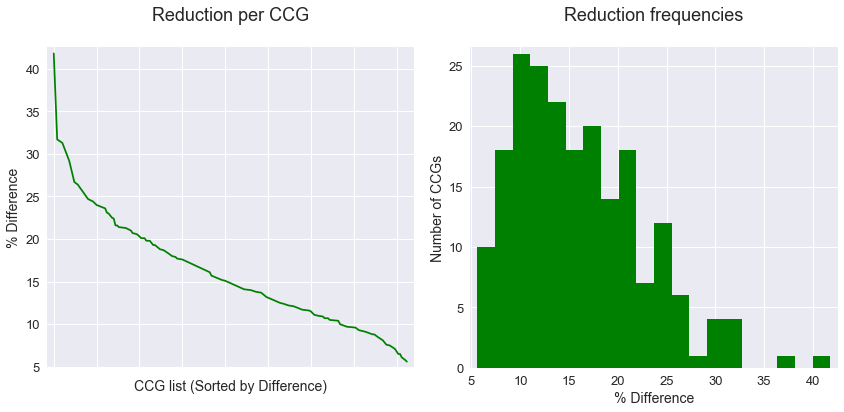

In [87]:
sns.set(font_scale = 1.3)

plt.subplot(1,2, 1)
kx=descriptive_all_sorted['%diff.'].plot(color=['green'], figsize=(12,6))
plt.xlabel('CCG list (Sorted by Difference)',fontsize=14)
plt.ylabel('% Difference', fontsize=14)
kx.set_title('Reduction per CCG\n', fontsize=18)
kx.margins(0.02)

plt.subplot(1,2, 2)
lx=descriptive_all_sorted['%diff.'].plot(kind='hist',bins=20, color=['green'], figsize=(12,6))
lx.set_title('Reduction frequencies\n', fontsize=18)
plt.xlabel('% Difference',fontsize=14)
plt.ylabel('Number of CCGs', fontsize=14)
lx.margins(0.02)


plt.tight_layout()
plt.show()

In [88]:
#use plotly to show individual ccgs
data = [
    go.Scatter(
        x=descriptive_all.index, 
        y=descriptive_all_sorted['%diff.'],
        mode = 'lines+markers',
        line = dict(
        color = ('rgb(40, 140, 60)'),
        width = 2)
    )
]
py.iplot(data, filename='%diff_ccgs')

Findings: The typical difference between minimal and maximal levels of perscription is aruond 10%. 
Some trusts however, showed much higher levels of difference, between 25-40%. 

In [89]:
#results to csvs for dashboard
descriptive_all.to_csv('diff_2014_2017.csv')